In [1]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from PIL import Image
from PIL.ImageDraw import Draw
import random
import numpy as np

In [2]:
from model import *
from utils import *
from train import *
from inference import inference

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datatset_path = '../datasets/dataset_v5'

batch_size = 512
num_epochs = 40
lr = 1e-4

In [4]:
# Set a random seed for reproducibility
seed = 23
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [5]:
dataset = CharDataset(datatset_path, transform=transform, max_crop_error=0.1)

In [6]:
total_size = len(dataset)
train_size = int(0.90 * total_size)
#val_size = int(0.10 * total_size)
#test_size = total_size - train_size - val_size
val_size = total_size - train_size

# Randomly split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataset.transform = transform_noise

# Create the DataLoader for the training set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, collate_fn=custom_collate, prefetch_factor=2)

# Create the DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=8, collate_fn=custom_collate, prefetch_factor=2)

In [7]:
model = CaptchaCharClassifier(dropout_rate=0.3, device=device).to(device)

In [9]:
model, train_loss_history, val_loss_history = train(model, train_loader, val_loader, num_epochs, lr, device, checkpoint_dir='models/checkpoints_v5')

Training: 100%|██████████| 264/264 [04:53<00:00,  1.11s/it]

Epoch [1/40], Train Loss: 1.9529


Epoch [1/40], Val Loss: 0.5558
Checkpoint saved at models/checkpoints_v5/model_epoch_1.pth


Training: 100%|██████████| 264/264 [04:42<00:00,  1.07s/it]

Epoch [2/40], Train Loss: 0.3800


Epoch [2/40], Val Loss: 0.2273
Checkpoint saved at models/checkpoints_v5/model_epoch_2.pth


Training: 100%|██████████| 264/264 [04:47<00:00,  1.09s/it]

Epoch [3/40], Train Loss: 0.1991


Epoch [3/40], Val Loss: 0.1457
Checkpoint saved at models/checkpoints_v5/model_epoch_3.pth


Training: 100%|██████████| 264/264 [04:51<00:00,  1.10s/it]

Epoch [4/40], Train Loss: 0.1413


Epoch [4/40], Val Loss: 0.1121
Checkpoint saved at models/checkpoints_v5/model_epoch_4.pth


Training: 100%|██████████| 264/264 [04:47<00:00,  1.09s/it]

Epoch [5/40], Train Loss: 0.1114


Epoch [5/40], Val Loss: 0.0994
Checkpoint saved at models/checkpoints_v5/model_epoch_5.pth


Training: 100%|██████████| 264/264 [04:33<00:00,  1.04s/it]

Epoch [6/40], Train Loss: 0.0880


Epoch [6/40], Val Loss: 0.0786
Checkpoint saved at models/checkpoints_v5/model_epoch_6.pth


Training: 100%|██████████| 264/264 [04:36<00:00,  1.05s/it]

Epoch [7/40], Train Loss: 0.0801


Epoch [7/40], Val Loss: 0.0639
Checkpoint saved at models/checkpoints_v5/model_epoch_7.pth


Training: 100%|██████████| 264/264 [04:36<00:00,  1.05s/it]

Epoch [8/40], Train Loss: 0.0713


Epoch [8/40], Val Loss: 0.0640
Checkpoint saved at models/checkpoints_v5/model_epoch_8.pth


Training: 100%|██████████| 264/264 [04:33<00:00,  1.04s/it]

Epoch [9/40], Train Loss: 0.0626


Epoch [9/40], Val Loss: 0.0483
Checkpoint saved at models/checkpoints_v5/model_epoch_9.pth


Training: 100%|██████████| 264/264 [04:35<00:00,  1.04s/it]

Epoch [10/40], Train Loss: 0.0572


Epoch [10/40], Val Loss: 0.0477
Checkpoint saved at models/checkpoints_v5/model_epoch_10.pth


Training: 100%|██████████| 264/264 [04:40<00:00,  1.06s/it]

Epoch [11/40], Train Loss: 0.0530


Epoch [11/40], Val Loss: 0.0546
Checkpoint saved at models/checkpoints_v5/model_epoch_11.pth


Training: 100%|██████████| 264/264 [04:40<00:00,  1.06s/it]

Epoch [12/40], Train Loss: 0.0485


Epoch [12/40], Val Loss: 0.0412
Checkpoint saved at models/checkpoints_v5/model_epoch_12.pth


Training: 100%|██████████| 264/264 [04:39<00:00,  1.06s/it]

Epoch [13/40], Train Loss: 0.0445


Epoch [13/40], Val Loss: 0.0418
Checkpoint saved at models/checkpoints_v5/model_epoch_13.pth


Training: 100%|██████████| 264/264 [04:41<00:00,  1.07s/it]

Epoch [14/40], Train Loss: 0.0431


Epoch [14/40], Val Loss: 0.0386
Checkpoint saved at models/checkpoints_v5/model_epoch_14.pth


Training: 100%|██████████| 264/264 [04:39<00:00,  1.06s/it]

Epoch [15/40], Train Loss: 0.0402


Epoch [15/40], Val Loss: 0.0389
Checkpoint saved at models/checkpoints_v5/model_epoch_15.pth


Training: 100%|██████████| 264/264 [04:33<00:00,  1.04s/it]

Epoch [16/40], Train Loss: 0.0373


Epoch [16/40], Val Loss: 0.0366
Checkpoint saved at models/checkpoints_v5/model_epoch_16.pth


Training: 100%|██████████| 264/264 [04:43<00:00,  1.07s/it]

Epoch [17/40], Train Loss: 0.0352


Epoch [17/40], Val Loss: 0.0338
Checkpoint saved at models/checkpoints_v5/model_epoch_17.pth


Training: 100%|██████████| 264/264 [04:41<00:00,  1.07s/it]

Epoch [18/40], Train Loss: 0.0339


Epoch [18/40], Val Loss: 0.0275
Checkpoint saved at models/checkpoints_v5/model_epoch_18.pth


Training: 100%|██████████| 264/264 [04:47<00:00,  1.09s/it]

Epoch [19/40], Train Loss: 0.0320


Epoch [19/40], Val Loss: 0.0308
Checkpoint saved at models/checkpoints_v5/model_epoch_19.pth


Training: 100%|██████████| 264/264 [04:36<00:00,  1.05s/it]

Epoch [20/40], Train Loss: 0.0306


Epoch [20/40], Val Loss: 0.0282
Checkpoint saved at models/checkpoints_v5/model_epoch_20.pth


Training: 100%|██████████| 264/264 [04:31<00:00,  1.03s/it]

Epoch [21/40], Train Loss: 0.0294


Epoch [21/40], Val Loss: 0.0294
Checkpoint saved at models/checkpoints_v5/model_epoch_21.pth


Training: 100%|██████████| 264/264 [04:30<00:00,  1.03s/it]

Epoch [22/40], Train Loss: 0.0288


Epoch [22/40], Val Loss: 0.0277
Checkpoint saved at models/checkpoints_v5/model_epoch_22.pth


Training: 100%|██████████| 264/264 [04:32<00:00,  1.03s/it]

Epoch [23/40], Train Loss: 0.0260


Epoch [23/40], Val Loss: 0.0243
Checkpoint saved at models/checkpoints_v5/model_epoch_23.pth


Training: 100%|██████████| 264/264 [04:50<00:00,  1.10s/it]

Epoch [24/40], Train Loss: 0.0249


Epoch [24/40], Val Loss: 0.0304
Checkpoint saved at models/checkpoints_v5/model_epoch_24.pth


Training: 100%|██████████| 264/264 [04:43<00:00,  1.07s/it]

Epoch [25/40], Train Loss: 0.0257


Epoch [25/40], Val Loss: 0.0307
Checkpoint saved at models/checkpoints_v5/model_epoch_25.pth


Training: 100%|██████████| 264/264 [04:46<00:00,  1.08s/it]

Epoch [26/40], Train Loss: 0.0234


Epoch [26/40], Val Loss: 0.0315
Checkpoint saved at models/checkpoints_v5/model_epoch_26.pth


Training: 100%|██████████| 264/264 [04:48<00:00,  1.09s/it]

Epoch [27/40], Train Loss: 0.0223


Epoch [27/40], Val Loss: 0.0254
Checkpoint saved at models/checkpoints_v5/model_epoch_27.pth


Training: 100%|██████████| 264/264 [04:42<00:00,  1.07s/it]

Epoch [28/40], Train Loss: 0.0206


Epoch [28/40], Val Loss: 0.0248
Checkpoint saved at models/checkpoints_v5/model_epoch_28.pth


Training: 100%|██████████| 264/264 [04:40<00:00,  1.06s/it]

Epoch [29/40], Train Loss: 0.0210


Epoch [29/40], Val Loss: 0.0200
Checkpoint saved at models/checkpoints_v5/model_epoch_29.pth


Training: 100%|██████████| 264/264 [04:34<00:00,  1.04s/it]

Epoch [30/40], Train Loss: 0.0206


Epoch [30/40], Val Loss: 0.0237
Checkpoint saved at models/checkpoints_v5/model_epoch_30.pth


Training: 100%|██████████| 264/264 [04:36<00:00,  1.05s/it]

Epoch [31/40], Train Loss: 0.0195


Epoch [31/40], Val Loss: 0.0224
Checkpoint saved at models/checkpoints_v5/model_epoch_31.pth


Training: 100%|██████████| 264/264 [04:30<00:00,  1.02s/it]

Epoch [32/40], Train Loss: 0.0203


Epoch [32/40], Val Loss: 0.0287
Checkpoint saved at models/checkpoints_v5/model_epoch_32.pth


Training: 100%|██████████| 264/264 [04:32<00:00,  1.03s/it]

Epoch [33/40], Train Loss: 0.0201


Epoch [33/40], Val Loss: 0.0212
Checkpoint saved at models/checkpoints_v5/model_epoch_33.pth


Training: 100%|██████████| 264/264 [04:39<00:00,  1.06s/it]

Epoch [34/40], Train Loss: 0.0170


Epoch [34/40], Val Loss: 0.0178
Checkpoint saved at models/checkpoints_v5/model_epoch_34.pth


Training: 100%|██████████| 264/264 [04:40<00:00,  1.06s/it]

Epoch [35/40], Train Loss: 0.0182


Epoch [35/40], Val Loss: 0.0190
Checkpoint saved at models/checkpoints_v5/model_epoch_35.pth


Training: 100%|██████████| 264/264 [04:44<00:00,  1.08s/it]

Epoch [36/40], Train Loss: 0.0174


Epoch [36/40], Val Loss: 0.0230
Checkpoint saved at models/checkpoints_v5/model_epoch_36.pth


Training: 100%|██████████| 264/264 [04:40<00:00,  1.06s/it]

Epoch [37/40], Train Loss: 0.0166


Epoch [37/40], Val Loss: 0.0169
Checkpoint saved at models/checkpoints_v5/model_epoch_37.pth


Training: 100%|██████████| 264/264 [05:11<00:00,  1.18s/it]

Epoch [38/40], Train Loss: 0.0177


Epoch [38/40], Val Loss: 0.0190
Checkpoint saved at models/checkpoints_v5/model_epoch_38.pth


Training: 100%|██████████| 264/264 [04:30<00:00,  1.03s/it]

Epoch [39/40], Train Loss: 0.0157


Epoch [39/40], Val Loss: 0.0235
Checkpoint saved at models/checkpoints_v5/model_epoch_39.pth


Training: 100%|██████████| 264/264 [04:30<00:00,  1.03s/it]

Epoch [40/40], Train Loss: 0.0153


Epoch [40/40], Val Loss: 0.0159
Checkpoint saved at models/checkpoints_v5/model_epoch_40.pth


In [8]:
model, train_loss_history, val_loss_history = train(model, train_loader, val_loader, num_epochs, lr, device,
                                                    mixup_alpha=0.7, mixup_prob=0.5, T_0=15, T_mult=2,
                                                    checkpoint_dir='models/checkpoints_v4')

TypeError: train() got an unexpected keyword argument 'mixup_alpha'

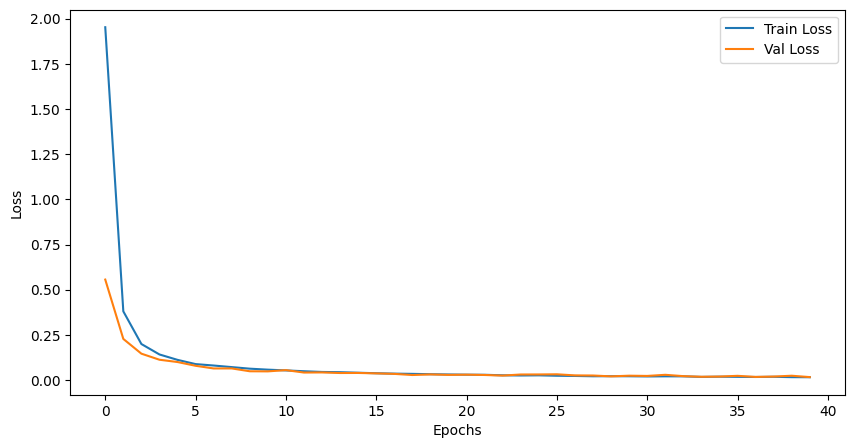

In [10]:
plot_loss(train_loss_history, val_loss_history)

In [7]:
model = CaptchaCharClassifier(dropout_rate=0.4, device=device).to(device)
epoch, train_loss_history, val_loss_history, scheduler = load_checkpoint('models/checkpoints_v4/model_epoch_22.pth', model)

/mnt/d/Documents/GitHub/captcha_solver/charcter_recognition/train.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Checkpoint loaded from models/checkpoints_v4/model_epoch_22.pth, Epoch: 22


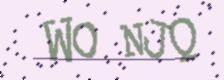

W -> W
O -> O
N -> N
J -> J
Q -> Q


In [15]:
num = '95'
path = '../datasets/dataset_v5/' + num
image = Image.open(path + '.jpg')
bbs = []
c_s = []
with open(path + '.txt', 'r') as f:
    for line in f.readlines():
        data = line.strip().split(' ')
        class_char = data[0] # not used
        x_min, y_min, x_max, y_max = float(data[1]), float(data[2]), float(data[3]), float(data[4])
        c_s.append(class_char)
        bbs.append((x_min, y_min, x_max, y_max))

image.show()
for i in range(len(bbs)):
    c = inference(model, image, bbs[i], device, transform)
    print(f"{c_s[i]} -> {c}")

In [9]:
d = next(iter(train_loader))

In [10]:
d[0][0].shape

torch.Size([3, 66, 66])

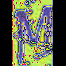

In [18]:
to_pil = T.ToPILImage()
image = to_pil(d[0][99])
image.show()

In [3]:
11//5

2